# Notebook for rink maps

## Housekeeping

### Import dependencies

In [1]:
import pandas as pd
import numpy as np

from chickenstats.chicken_nhl import Season, Scraper
from chickenstats.chicken_nhl.helpers import norm_coords

from hockey_rink import NHLRink
import matplotlib.pyplot as plt
import seaborn as sns

from dotenv import load_dotenv
from pathlib import Path

### Pandas options

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

### Environment variables

In [3]:
env_path = Path("../../../chickenstats-xg/.env")
load_dotenv(env_path)

True

## Scrape data

### Schedule and game IDs

In [4]:
season = Season(2023)

In [5]:
schedule = season.schedule("NSH")

Output()

In [6]:
game_ids = schedule.game_id.tolist()  # [:10]
game_id = game_ids[0]

### Play-by-play

In [7]:
scraper = Scraper(game_ids)

In [8]:
pbp = scraper.play_by_play

Output()

In [9]:
scraper.prep_stats(level="season")
stats = scraper.stats

In [10]:
scraper.prep_lines(level="season")
lines = scraper.lines

In [11]:
scraper.prep_team_stats(level="season")
team_stats = scraper.team_stats

## Rink plots

### Practice drawing

In [12]:
rink = NHLRink(rotation=90)

<Axes: >

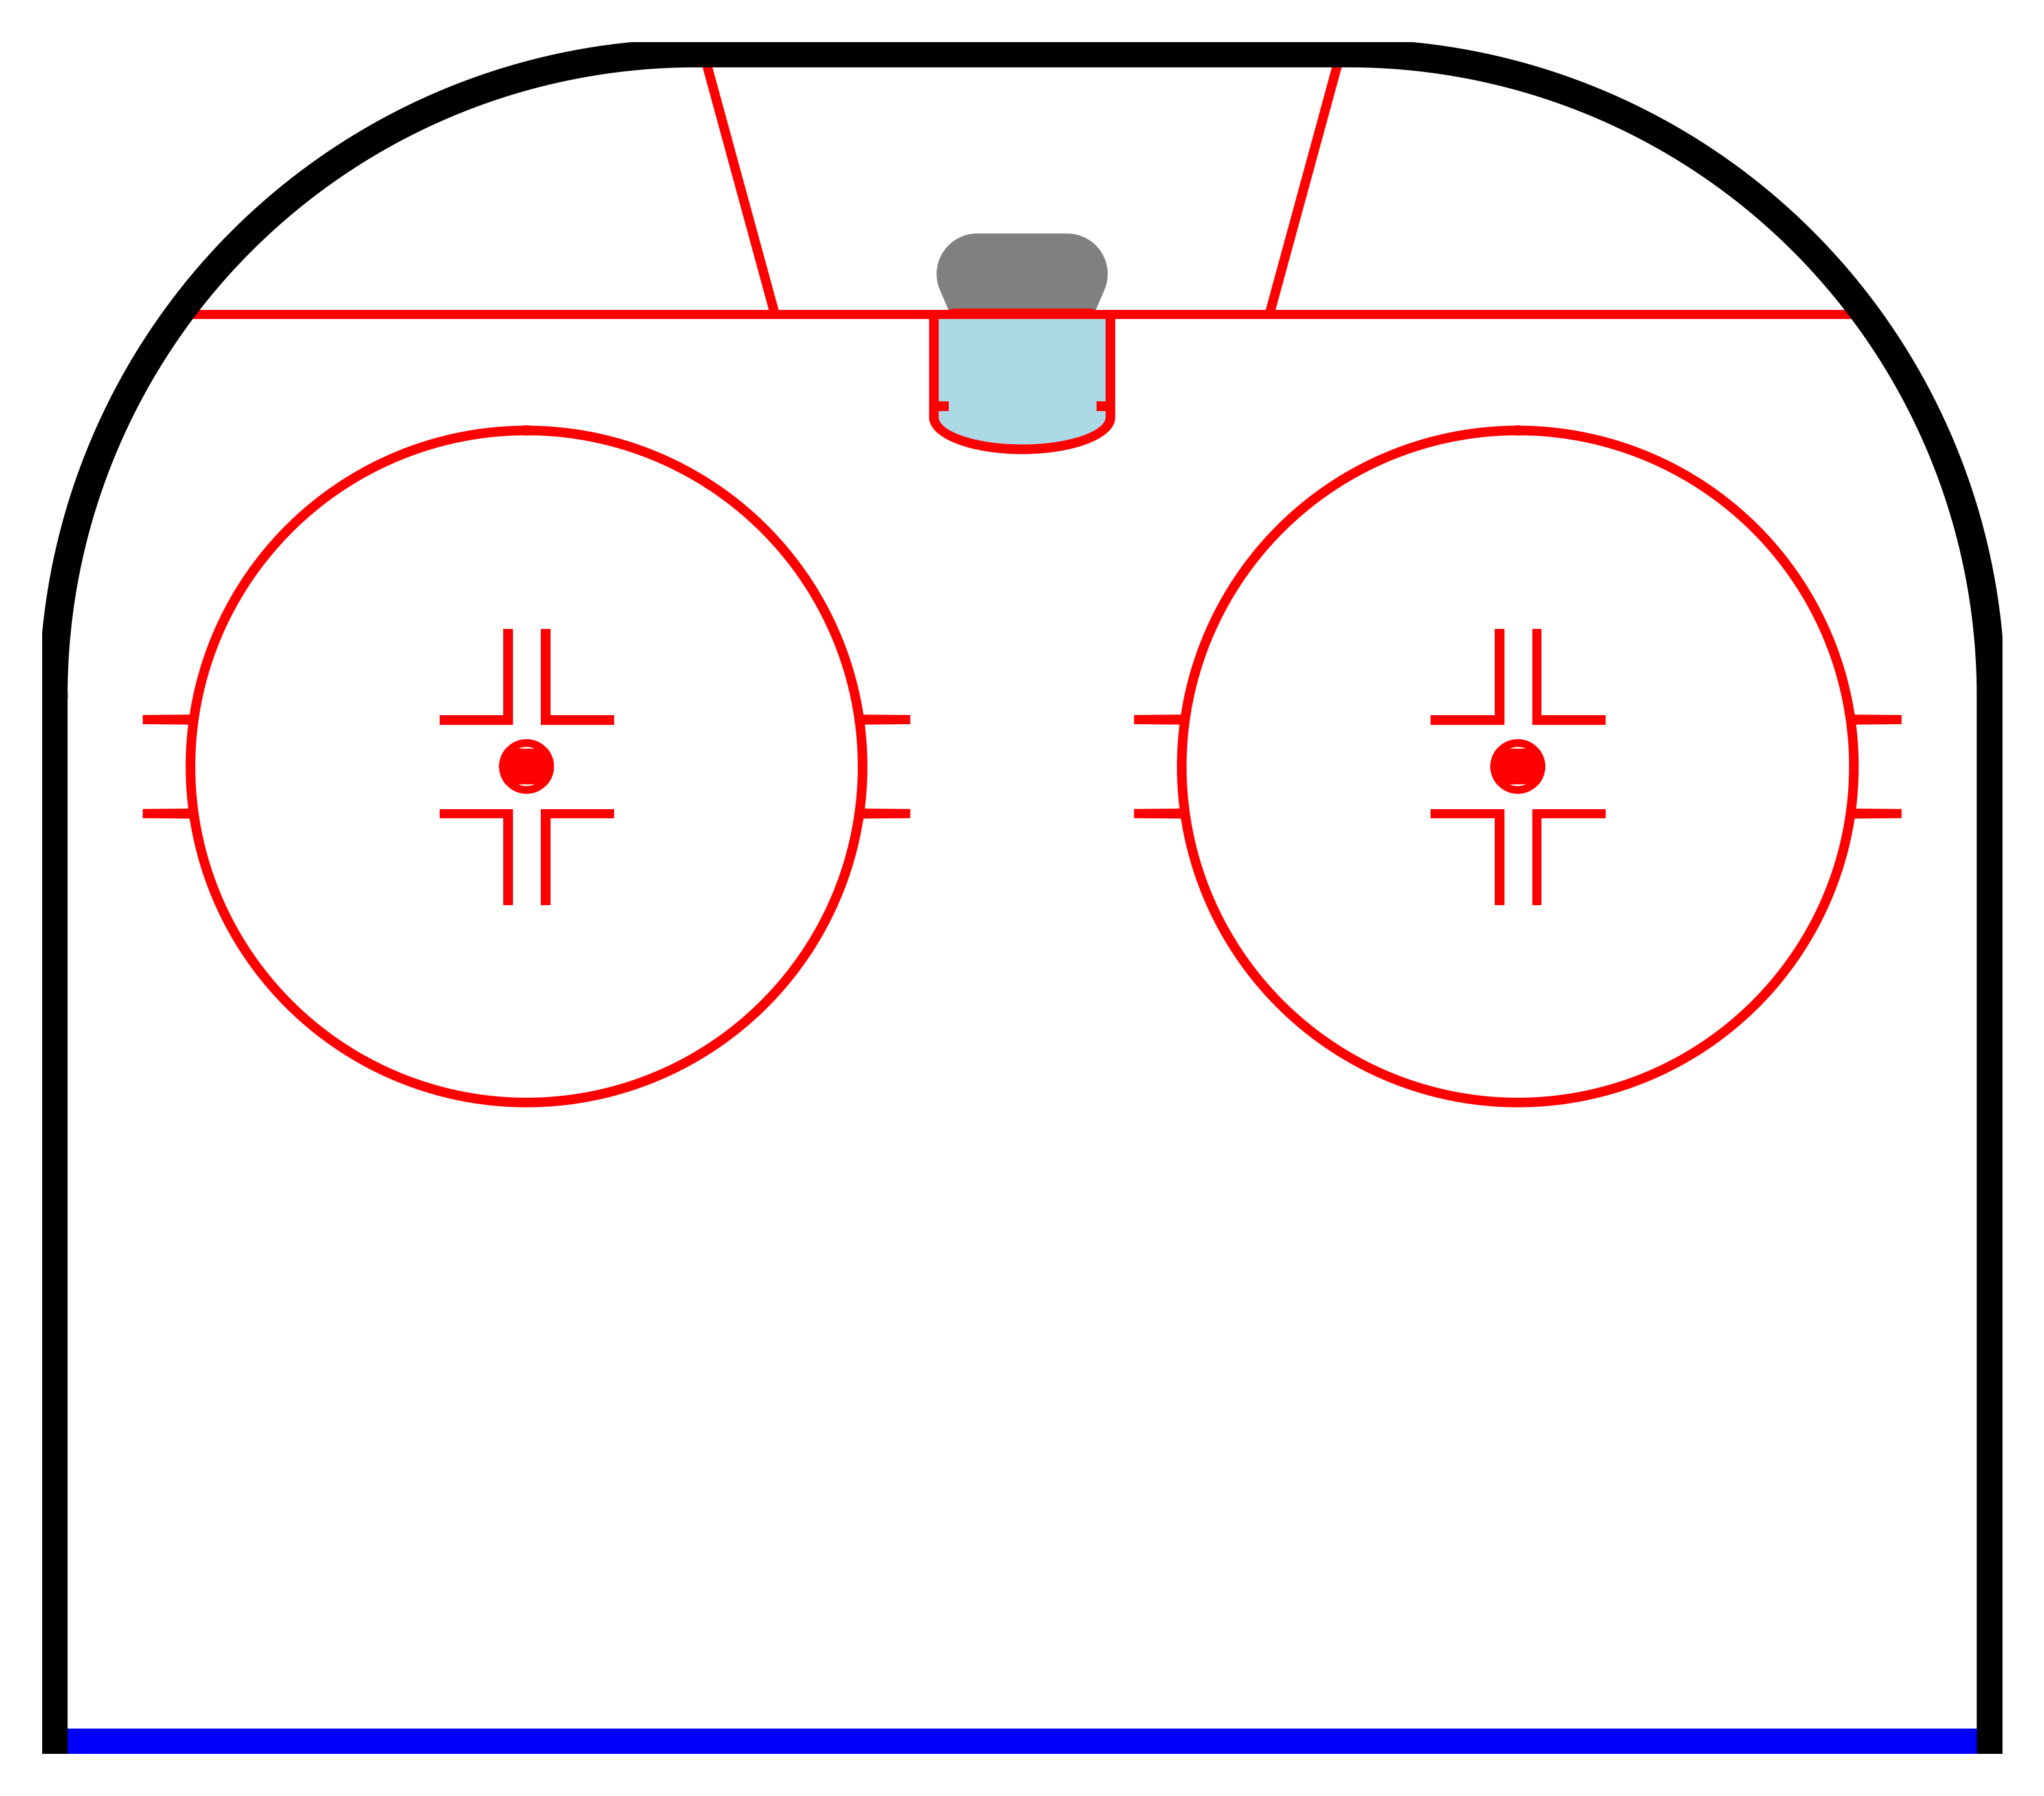

In [13]:
fig, ax = plt.subplots(dpi=650, figsize=(6, 6))

rink.draw(display_range="ozone", ax=ax)

In [21]:
top_shooters = stats.sort_values(by="ixg", ascending=False).head(6).player.tolist()

In [24]:
shot_events = ["GOAL", "SHOT", "MISS"]
strengths = ["5v5"]

conds = np.logical_and(pbp.event.isin(shot_events), pbp.strength_state.isin(strengths))

shots = pbp.loc[conds].reset_index(drop=True)
shots = norm_coords(shots, "NSH")

<Axes: xlabel='norm_coords_x', ylabel='norm_coords_y'>

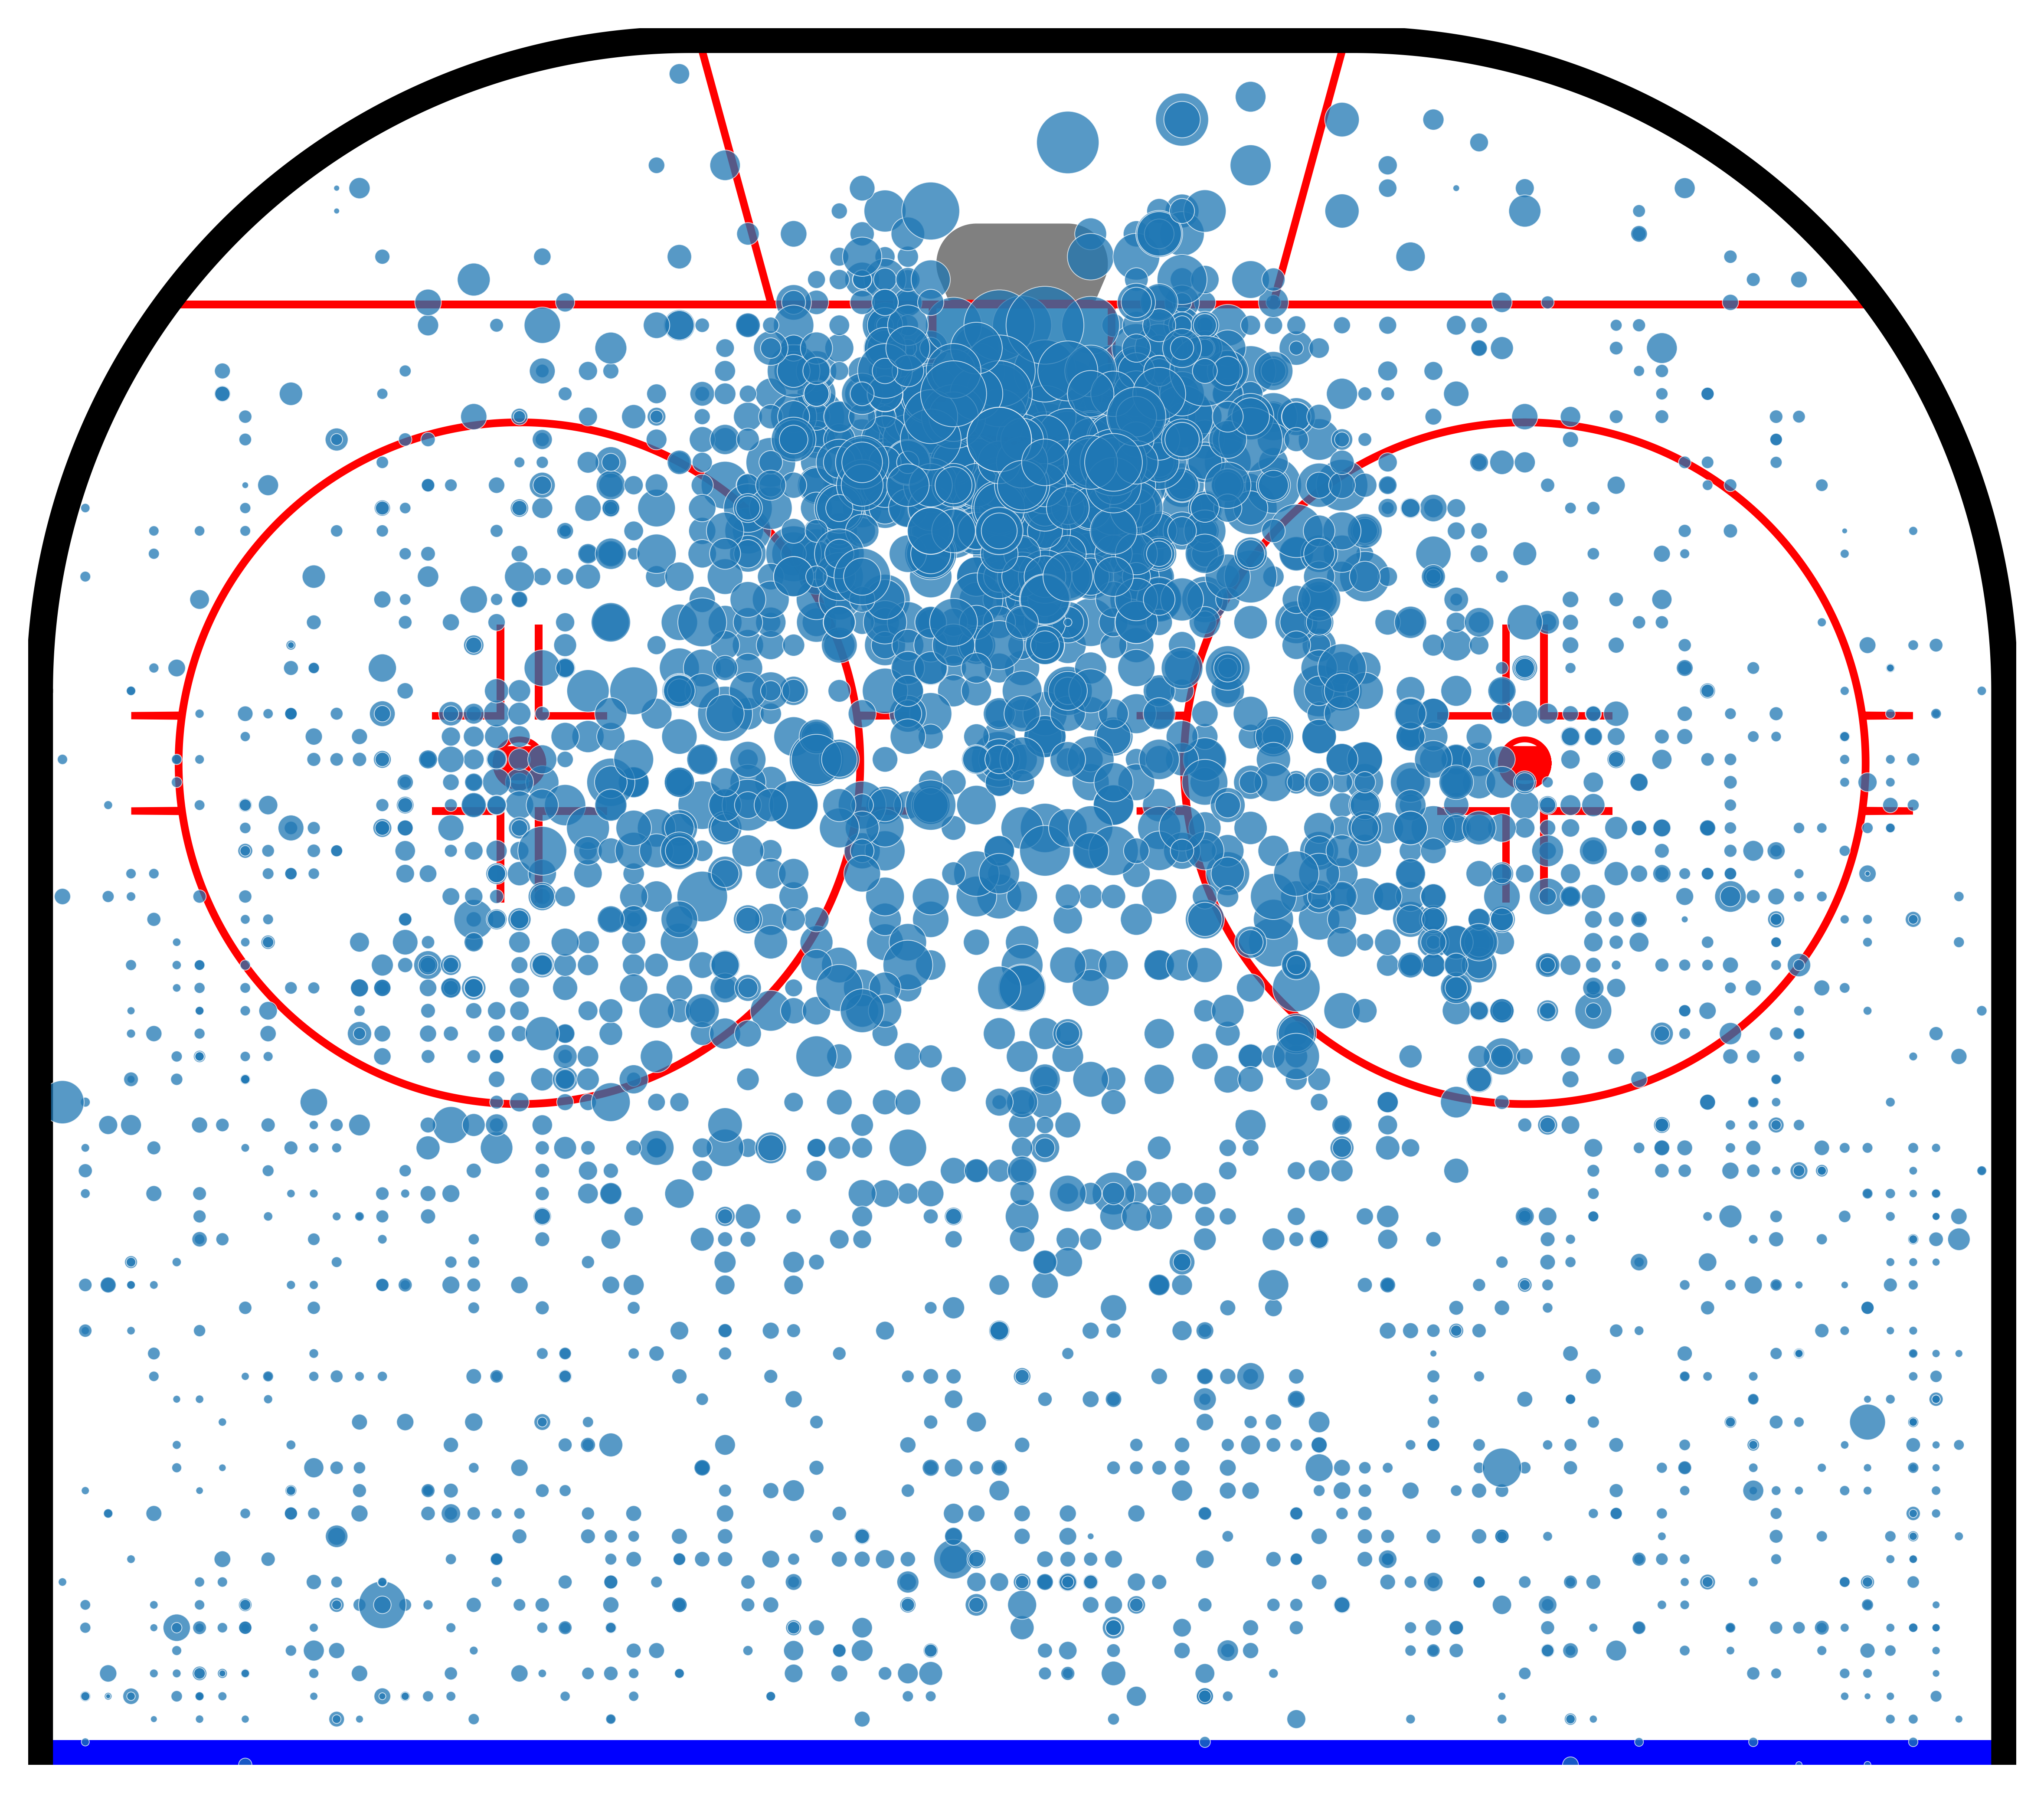

In [19]:
rink = NHLRink(rotation=90)

fig, axes = plt.subplots(dpi=650, figsize=(18, 8))

rink.draw(
    ax=ax,
    display_range="ozone",
)

data = norm_coords(shots, "NSH")

data = data.loc[data.event_team == "NSH"]

rink.plot_fn(
    sns.scatterplot,
    data=data,
    x="norm_coords_x",
    y="norm_coords_y",
    s=data.pred_goal * 750,
    zorder=100,
    alpha=0.75,
    ax=ax,
)
# rink.plot_fn(sns.scatterplot, data=data, x="coords_x", y="coords_y", sizes=100, ax=ax)

In [17]:
shots.head(3)

id    season session     game_id   game_date  event_idx  \
0  20230200010020  20232024       R  2023020001  2023-10-10         20   
1  20230200010021  20232024       R  2023020001  2023-10-10         21   
2  20230200010029  20232024       R  2023020001  2023-10-10         29   

   period  period_seconds  game_seconds strength_state event_team opp_team  \
0       1              61            61            5v5        TBL      NSH   
1       1              70            70            5v5        TBL      NSH   
2       1             107           107            5v5        TBL      NSH   

  event                                        description zone  coords_x  \
0  SHOT  TBL ONGOAL - #43 RADDYSH, WRIST , OFF. ZONE, 3...  OFF      59.0   
1  SHOT  TBL ONGOAL - #21 POINT, TIP-IN , OFF. ZONE, 11...  OFF      81.0   
2  SHOT  TBL ONGOAL - #84 JEANNOT, SNAP , OFF. ZONE, 45...  OFF      55.0   

   coords_y  danger  high_danger        player_1  player_1_eh_id  \
0     -26.0     0.0          0.0  DARREN RADDYSH  DARREN.RADDYSH   
1       8.0     0.0          1.0   BRAYDEN POINT   BRAYDEN.POINT   
2      30.0     0.0          0.0  TANNER JEANNOT  TANNER.JEANNOT   

  player_1_eh_id_api player_1_api_id player_1_position player_1_type player_2  \
0     DARREN.RADDYSH         8478178                 D       SHOOTER      NaN   
1      BRAYDEN.POINT         8478010                 C       SHOOTER      NaN   
2     TANNER.JEANNOT         8479661                 L       SHOOTER      NaN   

  player_2_eh_id player_2_eh_id_api  player_2_api_id player_2_position  \
0            NaN                NaN              NaN               NaN   
1            NaN                NaN              NaN               NaN   
2            NaN                NaN              NaN               NaN   

  player_2_type player_3 player_3_eh_id player_3_eh_id_api  player_3_api_id  \
0           NaN      NaN            NaN                NaN              NaN   
1           NaN      NaN            NaN                NaN              NaN   
2           NaN      NaN            NaN                NaN              NaN   

  player_3_position player_3_type score_state  score_diff  forwards_percent  \
0               NaN           NaN         0v0           0               0.6   
1               NaN           NaN         0v0           0               0.6   
2               NaN           NaN         0v0           0               0.6   

   opp_forwards_percent shot_type  event_length  event_distance  pbp_distance  \
0                   0.6     WRIST             9       39.698866          39.0   
1                   0.6    TIP-IN            11       11.313708          11.0   
2                   0.6      SNAP             2       45.343136          45.0   

   event_angle penalty  penalty_length  home_score  home_score_diff  \
0    40.914383     NaN             NaN           0                0   
1    45.000000     NaN             NaN           0                0   
2    41.423666     NaN             NaN           0                0   

   away_score  away_score_diff  is_home  is_away home_team away_team  \
0           0                0        1        0       TBL       NSH   
1           0                0        1        0       TBL       NSH   
2           0                0        1        0       TBL       NSH   

   home_skaters  away_skaters  \
0             5             5   
1             5             5   
2             5             5   

                                             home_on  \
0  BRAYDEN POINT, NIKITA KUCHEROV, STEVEN STAMKOS...   
1  BRAYDEN POINT, NIKITA KUCHEROV, STEVEN STAMKOS...   
2  LUKE GLENDENING, WALTTERI MERELA, TANNER JEANN...   

                                       home_on_eh_id  \
0  BRAYDEN.POINT, NIKITA.KUCHEROV, STEVEN.STAMKOS...   
1  BRAYDEN.POINT, NIKITA.KUCHEROV, STEVEN.STAMKOS...   
2  LUKE.GLENDENING, WALTTERI.MERELA, TANNER.JEANN...   

                                home_on_api_id home_on_positions  \
0  8478010, 84764

In [18]:
shots.pred_goal.max()

np.float64(0.5685808658599854)